# 1. What are all the possible data preparation steps should be done?

## On a predictive modeling project, such as classification or regression, raw data tuypcally cannot be used directly.
- Machine learning algorithms require data to be numbers.
- Some machine learning algorithms impose requirements on the data.
- Statistical noise and errors in the data may need to be corrected.
- Complex nonlinear relationships may be teased out of the data.

As such, the raw data must be pre-processed prior to being used to fit and evaluate a machine learning model. This step in a predictive modeling project is referred to as “data preparation“, although it goes by many other names, such as “data wrangling“, “data cleaning“, “data pre-processing” and “feature engineering“. Some of these names may better fit as sub-tasks for the broader data preparation process.

- Data Cleaning: Identifying and correcting mistakes or errors in the data.
- Feature Selection: Identifying those input variables that are most relevant to the task.
- Data Transforms: Changing the scale or distribution of variables.
- Feature Engineering: Deriving new variables from available data.
- Dimensionality Reduction: Creating compact projections of the data.

Each of these tasks is a whole field of study with specialized algorithms.


# 2. Is this classification use case in imbalanced cndition? If yes how to handle it?

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_train = pd.read_csv('dataset/trainbase.csv')
df_test = pd.read_csv('dataset/testbase.csv')
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,13170.0,2.021011e+10,4.474680e+03,2.021010e+10,2.021010e+10,2.021011e+10,2.021011e+10,2.021012e+10
creditlimit,13170.0,2.070004e+07,2.957703e+07,3.000000e+06,5.000000e+06,9.000000e+06,2.200000e+07,1.000000e+09
n_cards,13170.0,2.503493e+00,1.012502e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.600000e+01
os_balance,13170.0,1.160585e+07,2.378763e+07,0.000000e+00,1.998926e+06,4.705553e+06,1.064840e+07,7.980586e+08
os_billing,13170.0,8.115265e+06,1.771476e+07,2.004300e+04,8.147260e+05,3.154396e+06,7.464537e+06,6.280000e+08
tot_cash_advance_trx,13170.0,7.273773e+04,5.812124e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.873341e+07
tot_retail_trx,13170.0,2.006182e+06,7.723783e+06,-1.566720e+07,0.000000e+00,2.040815e+05,1.412833e+06,2.850000e+08
remaining_unpaid_balance,13170.0,8.181807e+06,1.925655e+07,0.000000e+00,0.000000e+00,2.753848e+06,7.185789e+06,4.440000e+08
rasio_pembayaranpayment_ratio,13170.0,6.579761e+01,8.554434e+02,-1.813800e+04,0.000000e+00,2.660000e+01,1.000000e+02,6.898300e+04
overlimit_pct,13170.0,3.363252e+00,9.175405e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.240000e+00,1.900000e+02


0    12008
1     1162
Name: good_bad_flag, dtype: int64


0    0.911769
1    0.088231
Name: good_bad_flag, dtype: float64


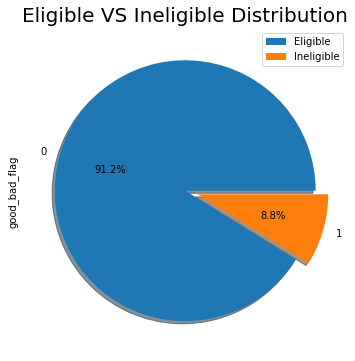

In [6]:
print(df_train['good_bad_flag'].value_counts())
print('\n')
print(df_train['good_bad_flag'].value_counts(normalize=True))

df_train["good_bad_flag"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Eligible VS Ineligible Distribution",fontsize=20)
plt.legend(["Eligible", "Ineligible"])
plt.show()

### Presence of 'Imbalanced cndition' 

This dataset has 1162 ineligible out of 12008 users. The dataset is highly unbalanced, the positive class (Bad Flag) account for 8.8% of all users. Most of the user are eligible. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are ineligible (BAD Flag). But we don't want our model to assume, we want our model to detect patterns that give signs of ineligible!

In [12]:
# check null
df_train.isna().sum()

id                                          0
creditlimit                                 0
n_cards                                     0
os_balance                                  0
os_billing                                  0
tot_cash_advance_trx                        0
tot_retail_trx                              0
remaining_unpaid_balance                    0
branchcode                                 86
rasio_pembayaranpayment_ratio               0
overlimit_pct                               0
payment_ration_3months                      0
payment_ration_6months                      0
deliquncy_score                             0
good_bad_flag                               0
loan_tenure                                 0
total_trx                                   0
remaining_statement_balance_per_n_cards     0
remaining_statement_balance_per_limit       0
total_trx_per_limit                         0
tot_trx_3months_per_limit                   0
tot_trx_6months_per_limit         

<AxesSubplot:>

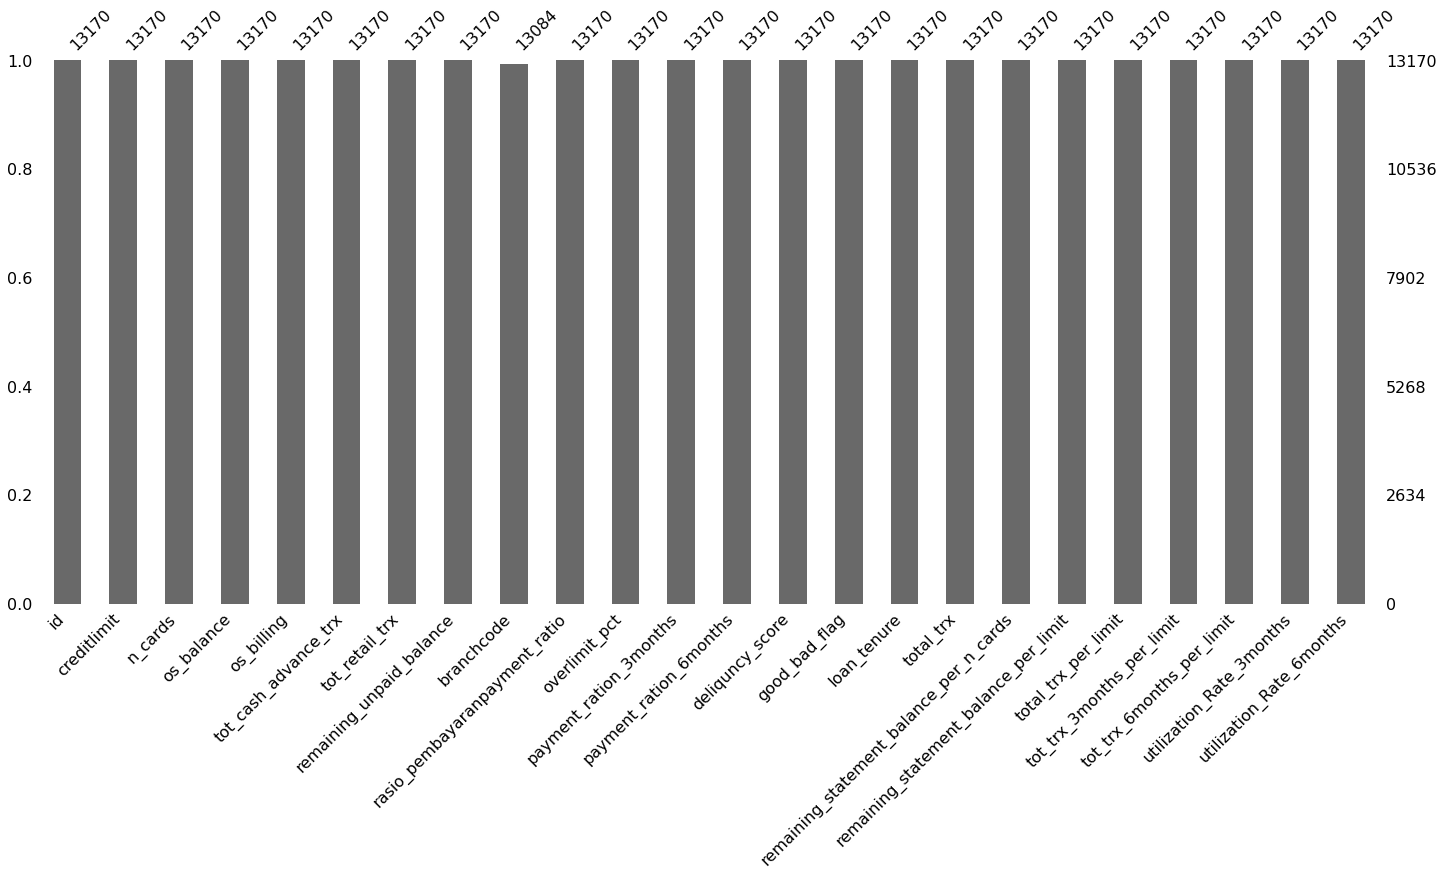

In [15]:
import missingno as msno
msno.bar(df_train)

In [ ]:
msno.matrix(da )